In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/validation.csv
/kaggle/input/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/train.csv
/kaggle/input/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/test.csv
/kaggle/input/glove6b/glove.6B.200d.txt
/kaggle/input/glove6b/glove.6B.50d.txt
/kaggle/input/glove6b/glove.6B.300d.txt
/kaggle/input/glove6b/glove.6B.100d.txt


## Importing libraries


In [2]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim import corpora, models

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
from nltk import FreqDist
import pandas as pd
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *


from wordcloud import WordCloud

/opt/conda/lib/python3.7/site-packages/past/types/oldstr.py:36: DeprecationWarning: invalid escape sequence \d
  """
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [3]:
!pip install gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gdown: filename=gdown-4.5.1-py3-none-any.whl size=14933 sha256=c9b672c0fbe8425320697c1fa851835e82a2168589d3748e12d8359619dbf81a
  Stored in directory: /root/.cache/pip/wheels/3d/ec/b0/a96d1d126183f98570a785e6bf8789fca559853a9260e928e1
Successfully built gdown


In [4]:
!gdown --id 1BuR6VZ-nr47vwfVARIXmGPfdhfNqzF9z

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1BuR6VZ-nr47vwfVARIXmGPfdhfNqzF9z
To: /kaggle/working/test.csv
100%|███████████████████████████████████████| 49.9M/49.9M [00:00<00:00, 266MB/s]


In [5]:
df= pd.read_csv("/kaggle/working/test.csv")

In [6]:
df.head()

,id,article,highlights
0,92c514c913c0bdfe25341af9fd72b29db544099b,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...
3,caabf9cbdf96eb1410295a673e953d304391bfbb,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...
4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6..."


In [7]:
df =df[["article"]]
df.head()

,article
0,Ever noticed how plane seats appear to be gett...
1,A drunk teenage boy had to be rescued by secur...
2,Dougie Freedman is on the verge of agreeing a ...
3,Liverpool target Neto is also wanted by PSG an...
4,Bruce Jenner will break his silence in a two-h...


In [8]:
import random
i=random.randint(0,len(df))
df["article"][i]

"Can Rickie Lambert sue for restraint of trade? Brendan Rodgers has killed off Lambert's career and you've got to feel sorry for the player. You can't blame him for joining Liverpool – why would he turn that down? At the time he was a confident striker – playing regularly in the Premier League and scoring goals for Southampton. He'd just been to a World Cup. Rickie Lambert has scarcely been given a chance since joining Liverpool despite their striking problems . Brendan Rodgers' decision to ignore Lambert, in favour of Mario Balotelli, is completely illogical . This time last year Lambert was about to play at a World Cup for England but his stock has fallen since . For Rodgers to ignore him when they have desperately needed goals is illogical. I'm well aware Lambert isn't Luis Suarez, I know he's not a world-class striker. Lambert missed out on Saturday at West Brom because of a hip injury but it must have been gutting for him to see Mario Balotelli get yet another chance. The England 

## Data Processing

In [9]:
import re
df["article"]=[re.sub('\d','', i)for i in df["article"]]
df.head(10)

<>:2: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \d
/tmp/ipykernel_17/1983774402.py:2: DeprecationWarning: invalid escape sequence \d
  df["article"]=[re.sub('\d','', i)for i in df["article"]]


,article
0,Ever noticed how plane seats appear to be gett...
1,A drunk teenage boy had to be rescued by secur...
2,Dougie Freedman is on the verge of agreeing a ...
3,Liverpool target Neto is also wanted by PSG an...
4,Bruce Jenner will break his silence in a two-h...
5,This is the moment that a crew of firefighters...
6,The amount of time people spend listening to B...
7,"(CNN)So, you'd like a ""Full House"" reunion and..."
8,"At :pm, former world champion Ken Doherty pott..."
9,A gang of six men have been jailed for a total...


In [10]:
import string
df["article"]=[re.sub('[%s]' % re.escape(string.punctuation), ' ', i) for i in df["article"]]
df.head(10)

,article
0,Ever noticed how plane seats appear to be gett...
1,A drunk teenage boy had to be rescued by secur...
2,Dougie Freedman is on the verge of agreeing a ...
3,Liverpool target Neto is also wanted by PSG an...
4,Bruce Jenner will break his silence in a two h...
5,This is the moment that a crew of firefighters...
6,The amount of time people spend listening to B...
7,CNN So you d like a Full House reunion and...
8,At pm former world champion Ken Doherty pott...
9,A gang of six men have been jailed for a total...


In [11]:
df["article"] = df["article"].str.lower()
df.head(10)

,article
0,ever noticed how plane seats appear to be gett...
1,a drunk teenage boy had to be rescued by secur...
2,dougie freedman is on the verge of agreeing a ...
3,liverpool target neto is also wanted by psg an...
4,bruce jenner will break his silence in a two h...
5,this is the moment that a crew of firefighters...
6,the amount of time people spend listening to b...
7,cnn so you d like a full house reunion and...
8,at pm former world champion ken doherty pott...
9,a gang of six men have been jailed for a total...


In [12]:
import pandas as pd 
import nltk 
nltk.download('punkt') 
from nltk.tokenize import word_tokenize
df["article_wt"] = [word_tokenize(i) for i in df["article"]]
df.head()

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,article,article_wt
0,ever noticed how plane seats appear to be gett...,"[ever, noticed, how, plane, seats, appear, to,..."
1,a drunk teenage boy had to be rescued by secur...,"[a, drunk, teenage, boy, had, to, be, rescued,..."
2,dougie freedman is on the verge of agreeing a ...,"[dougie, freedman, is, on, the, verge, of, agr..."
3,liverpool target neto is also wanted by psg an...,"[liverpool, target, neto, is, also, wanted, by..."
4,bruce jenner will break his silence in a two h...,"[bruce, jenner, will, break, his, silence, in,..."


In [13]:
nltk.download("stopwords") 
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

df["article_sw"] = [[i for i in j if not i in stop_words] for j in df["article_wt"]]# remove the word which is aviable in stopword libr
df.head()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,article,article_wt,article_sw
0,ever noticed how plane seats appear to be gett...,"[ever, noticed, how, plane, seats, appear, to,...","[ever, noticed, plane, seats, appear, getting,..."
1,a drunk teenage boy had to be rescued by secur...,"[a, drunk, teenage, boy, had, to, be, rescued,...","[drunk, teenage, boy, rescued, security, jumpi..."
2,dougie freedman is on the verge of agreeing a ...,"[dougie, freedman, is, on, the, verge, of, agr...","[dougie, freedman, verge, agreeing, new, two, ..."
3,liverpool target neto is also wanted by psg an...,"[liverpool, target, neto, is, also, wanted, by...","[liverpool, target, neto, also, wanted, psg, c..."
4,bruce jenner will break his silence in a two h...,"[bruce, jenner, will, break, his, silence, in,...","[bruce, jenner, break, silence, two, hour, int..."


In [14]:
import nltk
nltk.download('omw-1.4')
from collections import defaultdict
from nltk.corpus import wordnet as wn #the corpus reader wordnet is imported.
from nltk.tag import pos_tag
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. 
#By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN) #Dictionary is created where pos_tag (first letter) are the key values 
tag_map['J'] = wn.ADJ                   #whose values are mapped with the value 
tag_map['V'] = wn.VERB                  #from wordnet dictionary. We have taken the only first letter as 
tag_map['R'] = wn.ADV

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [15]:
from nltk.stem import WordNetLemmatizer 
 
lemmatizer = WordNetLemmatizer()

df["article_lemma"]=[[lemmatizer.lemmatize(word,tag_map[tag[0]]) for word ,tag in pos_tag(i)] for i in df["article_sw"]] 
df.head()

,article,article_wt,article_sw,article_lemma
0,ever noticed how plane seats appear to be gett...,"[ever, noticed, how, plane, seats, appear, to,...","[ever, noticed, plane, seats, appear, getting,...","[ever, notice, plane, seat, appear, get, small..."
1,a drunk teenage boy had to be rescued by secur...,"[a, drunk, teenage, boy, had, to, be, rescued,...","[drunk, teenage, boy, rescued, security, jumpi...","[drunk, teenage, boy, rescue, security, jump, ..."
2,dougie freedman is on the verge of agreeing a ...,"[dougie, freedman, is, on, the, verge, of, agr...","[dougie, freedman, verge, agreeing, new, two, ...","[dougie, freedman, verge, agree, new, two, yea..."
3,liverpool target neto is also wanted by psg an...,"[liverpool, target, neto, is, also, wanted, by...","[liverpool, target, neto, also, wanted, psg, c...","[liverpool, target, neto, also, want, psg, clu..."
4,bruce jenner will break his silence in a two h...,"[bruce, jenner, will, break, his, silence, in,...","[bruce, jenner, break, silence, two, hour, int...","[bruce, jenner, break, silence, two, hour, int..."


In [16]:
df["article_lemma_join"] = df["article_lemma"].apply(lambda x: " ".join(x))
df["article_lemma_join"].head()

0    ever notice plane seat appear get small small ...
1    drunk teenage boy rescue security jump lion en...
2    dougie freedman verge agree new two year deal ...
3    liverpool target neto also want psg club spain...
4    bruce jenner break silence two hour interview ...
Name: article_lemma_join, dtype: object

In [17]:
def frequent_words(x, terms = 20):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

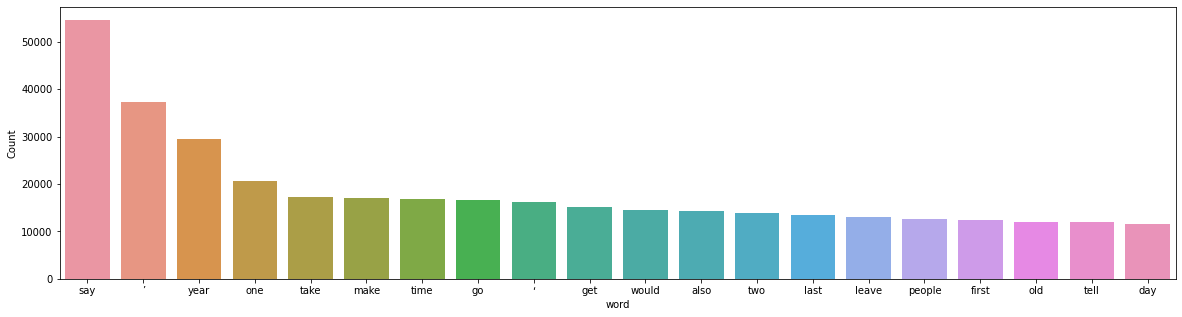

In [18]:
frequent_words(df["article_lemma_join"])

/opt/conda/lib/python3.7/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/opt/conda/lib/python3.7/site-packages/wordcloud/wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/opt/conda/lib/python3.7/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/conda/lib/python3.7/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/opt/conda/lib/python3.7/site-packages/wordcloud/wordcloud.py:5

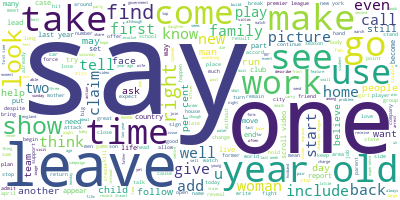

In [19]:
from wordcloud import WordCloud
long_string = ','.join(list(df["article_lemma_join"].values))

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

## Creating Dictionary and Corpus


In [20]:
id2word = corpora.Dictionary(df["article_lemma"])


texts = df["article_lemma"]


corpus = [id2word.doc2bow(text) for text in texts]

In [21]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.1,
                                           per_word_topics=True)

In [22]:
lda_model.print_topics()
doc_lda = lda_model[corpus]

## Evaluation of Topic Modeling Performance

In [23]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


coherence_model_lda = CoherenceModel(model=lda_model, texts=df["article_lemma"], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -12.247330144916553

Coherence Score:  0.506035653735414


In [24]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/opt/conda/lib/python3.7/site-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.174772  0.073047       1        1  18.831499
5     -0.067716  0.220163       2        1  11.198345
13    -0.136406  0.022594       3        1   8.794026
19    -0.119250 -0.078146       4        1   6.788658
16    -0.099730 -0.068413       5        1   5.700422
8     -0.033145  0.083588       6        1   5.631930
4     -0.057709  0.080201       7        1   4.932780
15    -0.113757 -0.057337       8        1   4.847100
11    -0.102019 -0.139387       9        1   4.585757
6     -0.094216 -0.040769      10        1   4.564764
14    -0.047178  0.027876      11        1   4.116201
12    -0.087728 -0.082813      12        1   3.756489
18    -0.054283 -0.019210      13        1   3.719002
2     -0.006402  0.121231      14        1   3.708720
10    -0.078892 -0.204427      15        1   3.480266
1      0.263765 -0.095743      16        1   2.035334
0      0.126334  0.271902      17        1   1.161726
3      0.293297 -0.015026      18        1   0.931051
17     0.240434 -0.046816      19        1   0.908457
9      0.349373 -0.052515      20        1   0.307474, topic_info=         Term          Freq         Total Category  logprob  loglift
759         ’  43690.000000  43690.000000  Default  30.0000  30.0000
758         ‘  20084.000000  20084.000000  Default  29.0000  29.0000
183    police  13469.000000  13469.000000  Default  28.0000  28.0000
91        say  67153.000000  67153.000000  Default  27.0000  27.0000
215      year  36543.000000  36543.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
4964  execute    131.517593    221.195733  Topic20  -4.6330   5.2646
6291    squad    230.742071   1584.351908  Topic20  -4.0709   3.8579
1593     drug    225.851587   2279.650360  Topic20  -4.0923   3.4726
139     death    264.232084   5016.146840  Topic20  -3.9353   2.8409
598      fire    178.415750   3469.044961  Topic20  -4.3280   2.8170

[1323 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
3605     10  0.252427    abbey
3605     16  0.736814    abbey
1145      4  0.997514   abbott
3051      3  0.991261  abdomen
6607     10  0.993108   absorb
...     ...       ...      ...
2769     13  0.039156        —
2769     16  0.423346        —
758      16  0.999958        ‘
759      16  0.999963        ’
2105     16  0.998351        “

[3517 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 14, 20, 17, 9, 5, 16, 12, 7, 15, 13, 19, 3, 11, 2, 1, 4, 18, 10])

/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
